# PROBLEM STATEMENT
Q. Find publicly available data for key factors that influence US home prices nationally. Then,
build a data science model that explains how these factors impacted home prices over the last 20
years. Use the S&P Case-Schiller Home Price Index as a proxy for home prices:
fred.stlouisfed.org/series/CSUSHPISA.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel(r'C:\Users\Gagan\OneDrive\Documents/Book1.xlsx')
df

,Date,Population,Mordgage_Rate(%),GDP(in Billions),Interest_Rate(%),Unemployment_Rate(%),House_Price_Index
0,2003-01-01,289000000,5.35,954.7,0.189,0.499,128.461
1,2003-02-01,289130000,5.39,1909.4,0.378,0.998,129.355
2,2003-03-01,289260000,5.44,2864.1,0.567,1.497,130.148
3,2003-04-01,289400000,5.49,3818.8,0.756,1.996,130.884
4,2003-05-01,289550000,5.53,4773.5,0.945,2.495,131.735
...,...,...,...,...,...,...,...
244,2023-05-01,334690000,8.82,10931.0,-0.200,3.400,302.566
245,2023-06-01,334830000,8.82,13117.0,0.100,3.800,304.593
246,2023-07-01,334990000,8.82,15303.0,0.100,3.900,306.767
247,2023-08-01,335160000,8.82,17489.0,0.400,3.900,309.155


In [3]:
df.shape

(249, 7)

In [4]:
df.head()

,Date,Population,Mordgage_Rate(%),GDP(in Billions),Interest_Rate(%),Unemployment_Rate(%),House_Price_Index
0,2003-01-01,289000000,5.35,954.7,0.189,0.499,128.461
1,2003-02-01,289130000,5.39,1909.4,0.378,0.998,129.355
2,2003-03-01,289260000,5.44,2864.1,0.567,1.497,130.148
3,2003-04-01,289400000,5.49,3818.8,0.756,1.996,130.884
4,2003-05-01,289550000,5.53,4773.5,0.945,2.495,131.735


In [5]:
df.tail()

,Date,Population,Mordgage_Rate(%),GDP(in Billions),Interest_Rate(%),Unemployment_Rate(%),House_Price_Index
244,2023-05-01,334690000,8.82,10931.0,-0.2,3.4,302.566
245,2023-06-01,334830000,8.82,13117.0,0.1,3.8,304.593
246,2023-07-01,334990000,8.82,15303.0,0.1,3.9,306.767
247,2023-08-01,335160000,8.82,17489.0,0.4,3.9,309.155
248,2023-09-01,335340000,8.82,19675.0,0.3,3.6,311.175


In [6]:
df.isnull().sum()

Date                    0
Population              0
Mordgage_Rate(%)        0
GDP(in Billions)        0
Interest_Rate(%)        0
Unemployment_Rate(%)    0
House_Price_Index       0
dtype: int64

<AxesSubplot:>

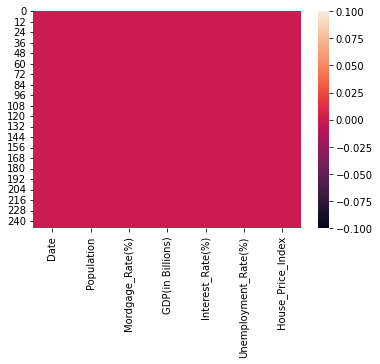

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  249 non-null    datetime64[ns]
 1   Population            249 non-null    int64         
 2   Mordgage_Rate(%)      249 non-null    float64       
 3   GDP(in Billions)      249 non-null    float64       
 4   Interest_Rate(%)      249 non-null    float64       
 5   Unemployment_Rate(%)  249 non-null    float64       
 6   House_Price_Index     249 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.7 KB


In [9]:
df.dtypes

Date                    datetime64[ns]
Population                       int64
Mordgage_Rate(%)               float64
GDP(in Billions)               float64
Interest_Rate(%)               float64
Unemployment_Rate(%)           float64
House_Price_Index              float64
dtype: object

In [10]:
df.describe()

,Population,Mordgage_Rate(%),GDP(in Billions),Interest_Rate(%),Unemployment_Rate(%),House_Price_Index
count,2.490000e+02,249.000000,249.000000,249.000000,249.000000,249.000000
mean,3.145967e+08,7.033052,9357.450161,1.296289,3.268402,185.081968
std,1.374424e+07,1.087456,5467.778572,1.217974,2.034535,46.531700
min,2.890000e+08,5.350000,954.700000,-0.360000,0.300000,128.461000
25%,3.031900e+08,6.020000,4826.000000,0.409000,1.621000,148.278000
50%,3.156100e+08,6.890000,8778.560000,1.050000,3.080000,174.342000
75%,3.266900e+08,7.980000,13162.600000,1.810000,4.451000,202.913000
max,3.353400e+08,8.980000,25462.700000,8.000000,9.630000,311.175000


# observation
1.check the shape of the dataset(249 rows and 7 columns)
2.check the data type and all the value are flost except population
3.no null values present in the dataset
4.Also drawn the heatmap to be double sure
5.There might be outliers present in the interest rate but to be double sure we will check in the graph

# NOW LETS ANALYZE THE DATA THROUGH VARIOUS GRAPH AND RECORD THE OBSERVATION

<AxesSubplot:xlabel='House_Price_Index', ylabel='Count'>

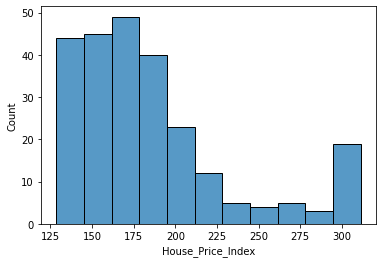

In [11]:
sns.histplot(x='House_Price_Index',data=df)

# Observation
According to the graph we can see that highest price index between 127 to 229 and the after that the price index decrease
and in the end we can say that price got increase 

<AxesSubplot:xlabel='Population', ylabel='Interest_Rate(%)'>

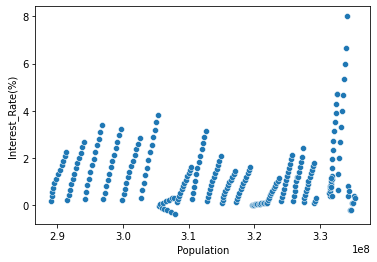

In [12]:
sns.scatterplot(x='Population',y='Interest_Rate(%)',data=df)

# Observation
According to the graph we can say that as population increases intreast rate also increases when population is between 
3.0-3.1 intreast rate reaches to 4 and after 3.3 intreast rate increases to 8 which is clear that intrest increases population
increases

<AxesSubplot:xlabel='Population', ylabel='Interest_Rate(%)'>

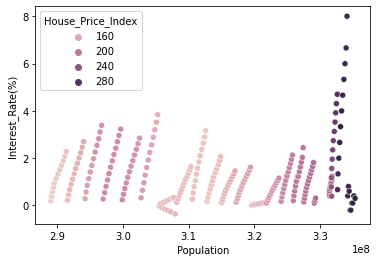

In [13]:
sns.scatterplot(x='Population',y='Interest_Rate(%)',hue='House_Price_Index',data=df)

# observation
In the above graph and according to house price index we can see that  when price index is between 160-200 and population is between 2.9-3.0 the interest rate is between 2-4 and when population increases but price index remain same the intrest rate gone above 4 and as population increases intrest rate is below 4 but when prce index reaches 280 and population also increases the interest rate gone beyond 8 which is utilize through graph

<AxesSubplot:xlabel='Interest_Rate(%)', ylabel='Unemployment_Rate(%)'>

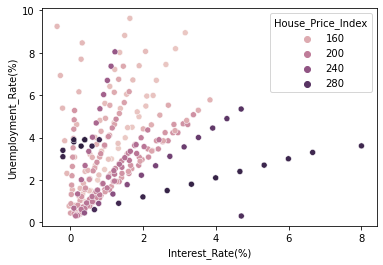

In [14]:
sns.scatterplot(x='Interest_Rate(%)',y='Unemployment_Rate(%)',hue='House_Price_Index',data=df)

# Observation
According to the graph and according to the price index when price index is 280 the intreast rate is 8
and seeing other price index it indicate the same and also we observe some of the point lies o when unemployment rate around 4 
it will clarify in the heatmap

<AxesSubplot:xlabel='House_Price_Index', ylabel='Interest_Rate(%)'>

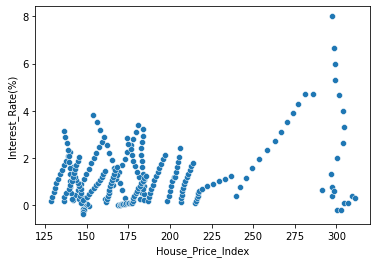

In [15]:
sns.scatterplot(x='House_Price_Index',y='Interest_Rate(%)',data=df)

# observation
when the price index between 125-200 the interest rate is between 2-4 and when price index increases from 200intrest rate
reaches to 4 and in the graph when price index reached 300 then intreast rate reaches to 8 so intrest rate has direct relation
with house price index

<AxesSubplot:xlabel='Population', ylabel='Unemployment_Rate(%)'>

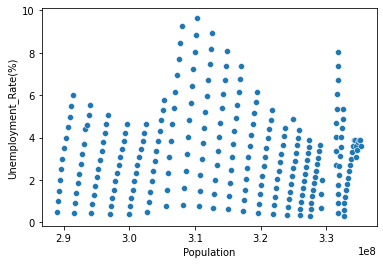

In [16]:
sns.scatterplot(x='Population',y='Unemployment_Rate(%)',data=df)

# observation
from the graph it is clear that when population is between 3.0-3.2 unemployment rate reached to its highest 
level which is 10 and after 3.2 unemployment decreses but still after 3.3 its on higher side 

<AxesSubplot:xlabel='GDP(in Billions)', ylabel='Population'>

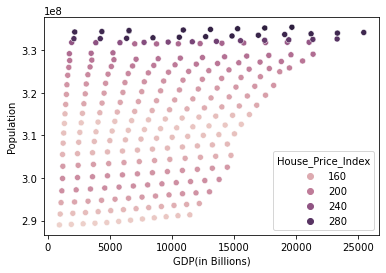

In [17]:
sns.scatterplot(x='GDP(in Billions)',y='Population',hue='House_Price_Index',data=df)

<AxesSubplot:xlabel='House_Price_Index', ylabel='Unemployment_Rate(%)'>

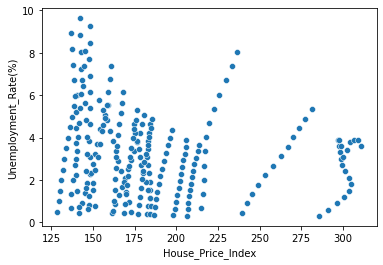

In [49]:
sns.scatterplot(x='House_Price_Index',y='Unemployment_Rate(%)',data=df)

# Observation
When house price index is between 125-175 the unemployment rate is at the highest level but as long as house price index increases unemployment rate decreases but not fully but unemployment level decreases between 2-4 when house price index is at 
300 which is quite intreasting

<function matplotlib.pyplot.show(close=None, block=None)>

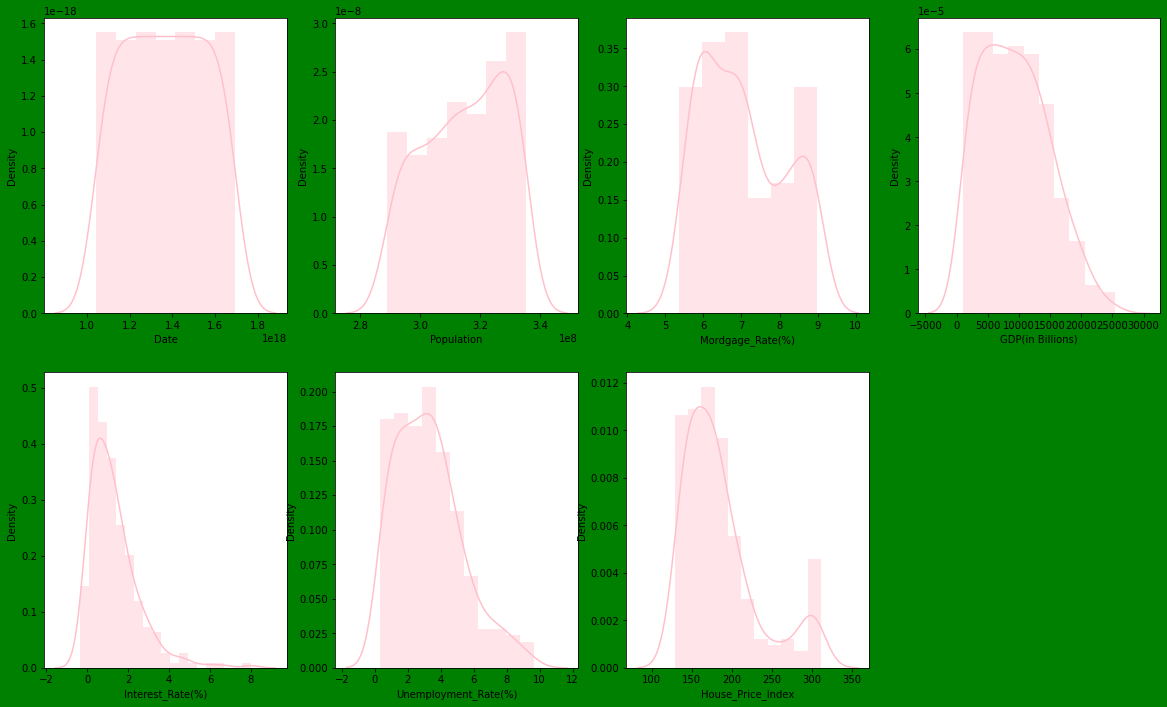

In [18]:
plt.figure(figsize=(20,25),facecolor='green')
plotnumber=1
for columns in df.columns:
    if plotnumber<=8:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[columns],color='pink')
        plt.xlabel(columns,fontsize=10)
    plotnumber+=1
plt.show

# Observation
We clearly see that the data is normally distributed and be see above the graph is little bit right screwed 
lets plot the bar graph and check whether the outliers present in the intrest rate or not 

In [19]:
df.corr()

,Population,Mordgage_Rate(%),GDP(in Billions),Interest_Rate(%),Unemployment_Rate(%),House_Price_Index
Population,1.000000,0.766081,0.387778,0.046730,-0.034231,0.718539
Mordgage_Rate(%),0.766081,1.000000,0.346865,0.236901,-0.229867,0.936017
GDP(in Billions),0.387778,0.346865,1.000000,0.585337,0.667707,0.344832
Interest_Rate(%),0.046730,0.236901,0.585337,1.000000,0.281969,0.330476
Unemployment_Rate(%),-0.034231,-0.229867,0.667707,0.281969,1.000000,-0.171912
House_Price_Index,0.718539,0.936017,0.344832,0.330476,-0.171912,1.000000


<AxesSubplot:>

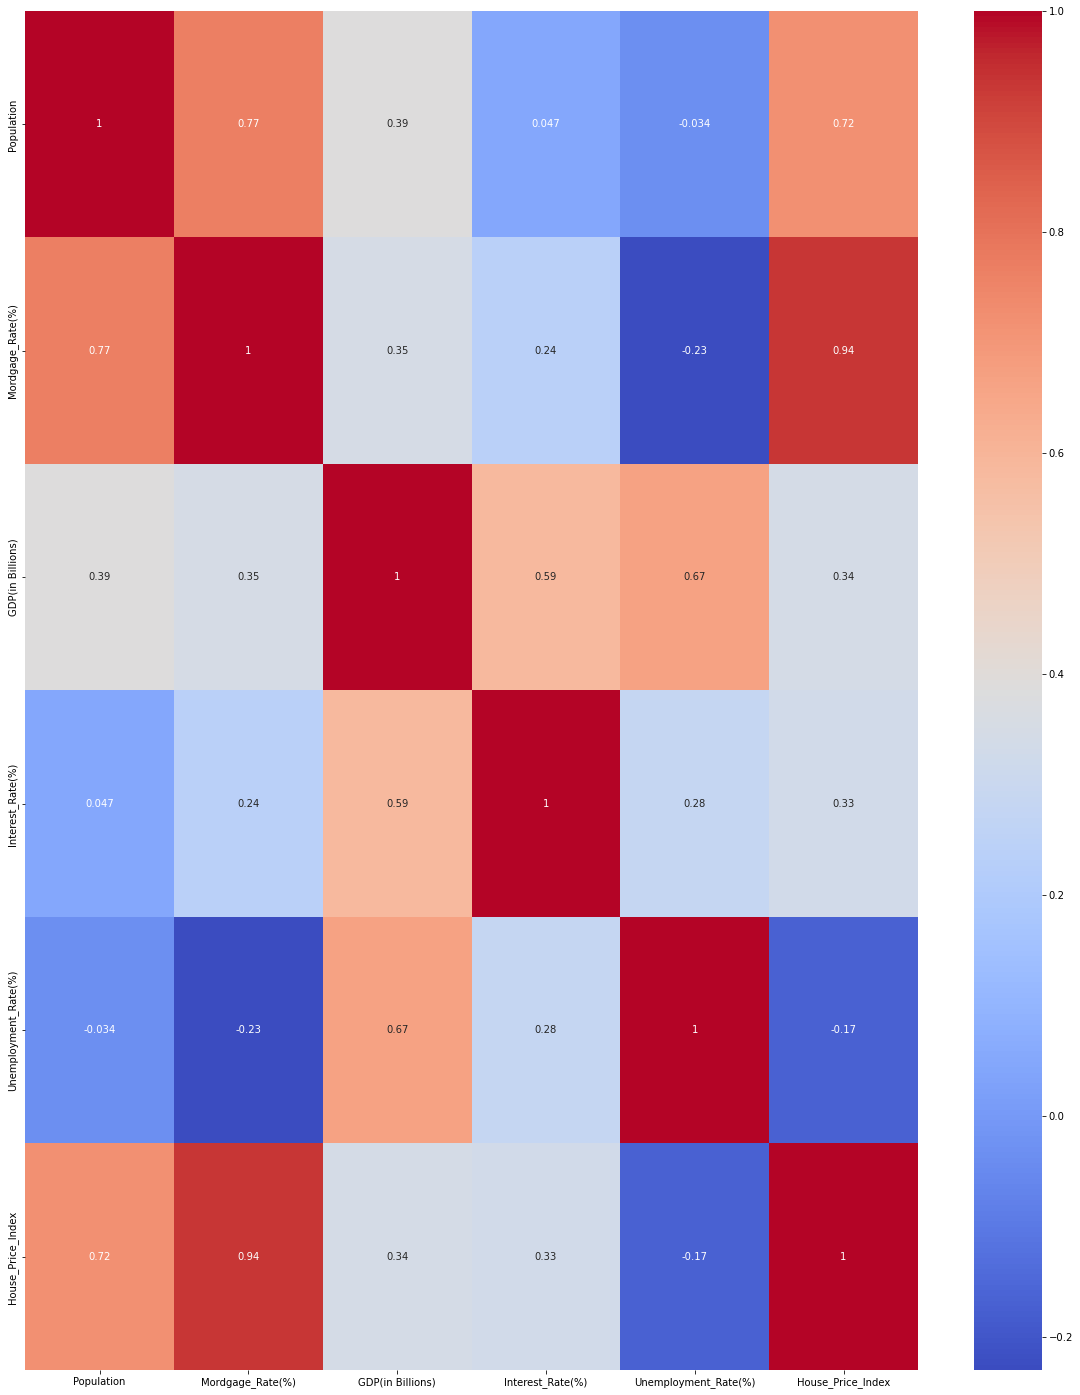

In [20]:
data=df.corr()
plt.figure(figsize=(20,25))
sns.heatmap(data,annot=True,cmap='coolwarm')

# observation
from the correlation graph we can see that mordgage rate and house price index is highly correlated and population is having 
correlation with house price index but unemployment rate and mordgage rate is having negetive relation and also unemployment
rate and house price index is having negetive correlation

# Now we will drop date column and move towards model building

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [22]:
df=df.drop('Date',axis=1)
df

,Population,Mordgage_Rate(%),GDP(in Billions),Interest_Rate(%),Unemployment_Rate(%),House_Price_Index
0,289000000,5.35,954.7,0.189,0.499,128.461
1,289130000,5.39,1909.4,0.378,0.998,129.355
2,289260000,5.44,2864.1,0.567,1.497,130.148
3,289400000,5.49,3818.8,0.756,1.996,130.884
4,289550000,5.53,4773.5,0.945,2.495,131.735
...,...,...,...,...,...,...
244,334690000,8.82,10931.0,-0.200,3.400,302.566
245,334830000,8.82,13117.0,0.100,3.800,304.593
246,334990000,8.82,15303.0,0.100,3.900,306.767
247,335160000,8.82,17489.0,0.400,3.900,309.155


In [23]:
X=df.drop("House_Price_Index",axis=1)
Y=df["House_Price_Index"]

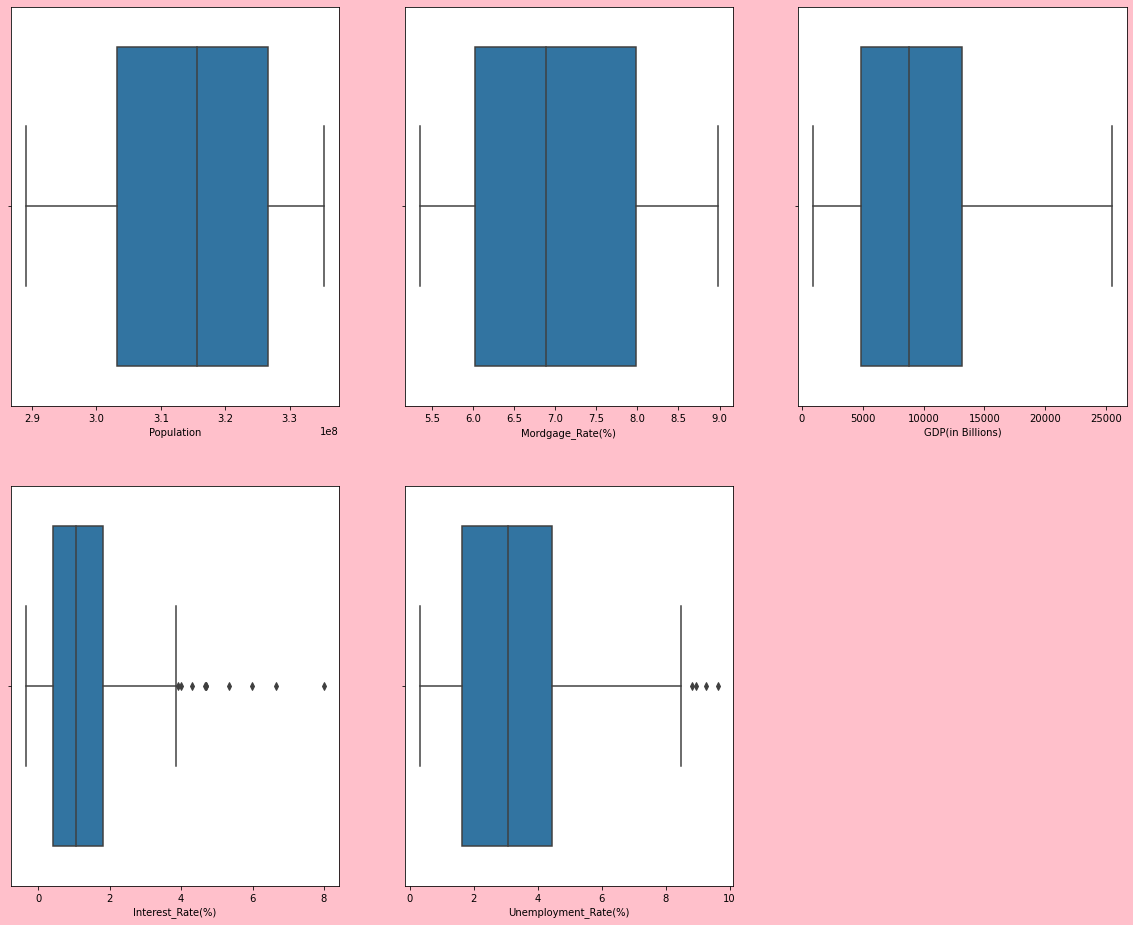

In [24]:
plt.figure(figsize=(20,25),facecolor='pink')
plotnumber=1
for columns in X:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(X[columns])
        
    plotnumber+=1
plt.show()

# Observation
as we can see that outliers present in the interest rate column but we will not remove that outlier because our dataset is too short and if we remove the outliers we might lost important information from the dataset.By doing it will affect the performance of the model

In [25]:
X.shape

(249, 5)

In [26]:
Y.shape

(249,)

In [27]:
scaler=StandardScaler()
X_Scaled=scaler.fit_transform(X)

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=82, test_size=.25)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (186, 5)
Training target vector size: (186,)
Test feature matrix size: (63, 5)
Test target vector size: (63,)


In [29]:
log_reg=LinearRegression()
log_reg.fit(X_train,Y_train)

LinearRegression()

In [30]:
y_pred=log_reg.predict(X_test)
print('Predicted result price:\n', y_pred)
print(r2_score(Y_test,y_pred))
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))

Predicted result price:
 [185.65884464 140.41912061 182.43584383 137.12070627 244.65478315
 144.2279416  240.05700797 131.28033444 220.89639424 115.64803291
 169.99360272 138.77924889 261.83180552 143.7182038  168.48911441
 133.88034589 150.17156856 189.0532525  268.04271609 142.48878261
 135.67983504 172.35563592 166.32708113 216.60520919 136.48593061
 170.73759789 144.08289003 239.45155734 280.29320708 161.55946267
 240.67668728 226.70617638 238.91232307 140.37969598 224.99088055
 157.12158402 145.16716302 159.60541432 238.35817437 176.79034104
 169.67647057 167.2906774  217.46640505 169.36306427 222.00842945
 146.09215632 121.61060961 188.4792865  142.08975169 251.37565268
 206.26965704 147.14141763 134.88100362 145.04532042 145.98085602
 144.70993792 202.13133459 204.18559235 177.66368302 178.85535772
 217.47498076 188.8674761  142.70457668]
0.8526460770422988
Mean absolute error : 11.325793279570794
Mean squared error : 320.90749483476094


In [32]:
dtc = DecisionTreeRegressor()
ad=AdaBoostRegressor()
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [33]:
dtc.fit(X_train,Y_train)
Y_pred=dtc.predict(X_test)
print('Predicted result price:\n', y_pred)
print(r2_score(Y_test,y_pred))
print('Mean absolute error :', mean_absolute_error(Y_test,Y_pred))
print('Mean squared error :', mean_squared_error(Y_test,Y_pred))

Predicted result price:
 [185.65884464 140.41912061 182.43584383 137.12070627 244.65478315
 144.2279416  240.05700797 131.28033444 220.89639424 115.64803291
 169.99360272 138.77924889 261.83180552 143.7182038  168.48911441
 133.88034589 150.17156856 189.0532525  268.04271609 142.48878261
 135.67983504 172.35563592 166.32708113 216.60520919 136.48593061
 170.73759789 144.08289003 239.45155734 280.29320708 161.55946267
 240.67668728 226.70617638 238.91232307 140.37969598 224.99088055
 157.12158402 145.16716302 159.60541432 238.35817437 176.79034104
 169.67647057 167.2906774  217.46640505 169.36306427 222.00842945
 146.09215632 121.61060961 188.4792865  142.08975169 251.37565268
 206.26965704 147.14141763 134.88100362 145.04532042 145.98085602
 144.70993792 202.13133459 204.18559235 177.66368302 178.85535772
 217.47498076 188.8674761  142.70457668]
0.8526460770422988
Mean absolute error : 1.5133492063492096
Mean squared error : 5.013382301587312


In [34]:
ad.fit(X_train,Y_train)
pred=ad.predict(X_test)
print('Predicted result price:\n', y_pred)
print(r2_score(Y_test,y_pred))
print('Mean absolute error :', mean_absolute_error(Y_test,pred))
print('Mean squared error :', mean_squared_error(Y_test,pred))

Predicted result price:
 [185.65884464 140.41912061 182.43584383 137.12070627 244.65478315
 144.2279416  240.05700797 131.28033444 220.89639424 115.64803291
 169.99360272 138.77924889 261.83180552 143.7182038  168.48911441
 133.88034589 150.17156856 189.0532525  268.04271609 142.48878261
 135.67983504 172.35563592 166.32708113 216.60520919 136.48593061
 170.73759789 144.08289003 239.45155734 280.29320708 161.55946267
 240.67668728 226.70617638 238.91232307 140.37969598 224.99088055
 157.12158402 145.16716302 159.60541432 238.35817437 176.79034104
 169.67647057 167.2906774  217.46640505 169.36306427 222.00842945
 146.09215632 121.61060961 188.4792865  142.08975169 251.37565268
 206.26965704 147.14141763 134.88100362 145.04532042 145.98085602
 144.70993792 202.13133459 204.18559235 177.66368302 178.85535772
 217.47498076 188.8674761  142.70457668]
0.8526460770422988
Mean absolute error : 2.4895699464909176
Mean squared error : 9.537917397436031


In [35]:
rf.fit(X_train,Y_train)
pred=rf.predict(X_test)
print('Predicted result price:\n', y_pred)
print(r2_score(Y_test,y_pred))
print('Mean absolute error :', mean_absolute_error(Y_test,pred))
print('Mean squared error :', mean_squared_error(Y_test,pred))

Predicted result price:
 [185.65884464 140.41912061 182.43584383 137.12070627 244.65478315
 144.2279416  240.05700797 131.28033444 220.89639424 115.64803291
 169.99360272 138.77924889 261.83180552 143.7182038  168.48911441
 133.88034589 150.17156856 189.0532525  268.04271609 142.48878261
 135.67983504 172.35563592 166.32708113 216.60520919 136.48593061
 170.73759789 144.08289003 239.45155734 280.29320708 161.55946267
 240.67668728 226.70617638 238.91232307 140.37969598 224.99088055
 157.12158402 145.16716302 159.60541432 238.35817437 176.79034104
 169.67647057 167.2906774  217.46640505 169.36306427 222.00842945
 146.09215632 121.61060961 188.4792865  142.08975169 251.37565268
 206.26965704 147.14141763 134.88100362 145.04532042 145.98085602
 144.70993792 202.13133459 204.18559235 177.66368302 178.85535772
 217.47498076 188.8674761  142.70457668]
0.8526460770422988
Mean absolute error : 1.2196646031745755
Mean squared error : 2.9092377468174067


# observation
From the above model we can see that the scores are same in all the mode but in decesion tree
the mean absolute error and mean squared error are less as compared to other models 

# NOW WE WILL DO HYPER PARAMERTER TUNNING SO THAT WE CAN SEE THAT SCORE CAN BE APPROVED OR NOT

In [36]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
grid_param={'max_depth' : range(5,10),
            'min_samples_leaf': range(3,6),
            'min_samples_split': range(3,8)}

In [38]:
rand_srch=RandomizedSearchCV(dtc,cv=5,param_distributions=grid_param)

In [39]:
rand_srch.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': range(5, 10),
                                        'min_samples_leaf': range(3, 6),
                                        'min_samples_split': range(3, 8)})

In [40]:
rand_srch.best_estimator_

DecisionTreeRegressor(max_depth=9, min_samples_leaf=3, min_samples_split=3)

In [41]:
dtc= DecisionTreeRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=4)
dtc.fit(X_train,Y_train)
Y_pred=dtc.predict(X_test)
print(r2_score(Y_test,Y_pred))
print('Mean absolute error :', mean_absolute_error(Y_test,Y_pred))
print('Mean squared error :', mean_squared_error(Y_test,Y_pred))

0.9967672691262153
Mean absolute error : 1.943552739984884
Mean squared error : 7.04024396065141


In [42]:
params={'n_estimators':[45,50,60,70], 'learning_rate':[0.25,0.30,0.40]}

In [43]:
Rand_srch=RandomizedSearchCV(ad,cv=5,param_distributions=params)

In [44]:
Rand_srch.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [45, 50, 60, 70]})

In [46]:
Rand_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.4)

In [47]:
ada=AdaBoostRegressor(n_estimators=45,learning_rate=0.4)
ada.fit(X_train,Y_train)
Y_pred=ada.predict(X_test)
print(r2_score(Y_test,Y_pred))
print('Mean absolute error :', mean_absolute_error(Y_test,Y_pred))
print('Mean squared error :', mean_squared_error(Y_test,Y_pred))

0.9926341422476022
Mean absolute error : 3.280661346503032
Mean squared error : 16.041371082531136


# As We can see that score improved through hyper parameter tunning 99% which is great

# FINAL REPORT

From the above data it is clear that all factor depend upon the house price index and now a days home price index in sept is 311 which is increased from the last three month also demand and supply has a direct relation with the house price index as when demand increases and supply decreases the price index increases same as the intrest rate. If intrest rate increases the price of the real estate also increases and in 2022 in corona the gdp decreases and house price also decreases and in the lockdown also population and house price index has a dirct relation because as population increases demand also increases so pice also increases and these are the main factors that affect the real estatec